In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from utils.DataLoader import loadData

img_w, img_h = 128, 128
rel_path = 'Lab1/Skin/'
x_train,x_test,y_train,y_test = loadData(img_w,img_h,rel_path)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


Number of epochs: 20, learing rate: 1e-05
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)

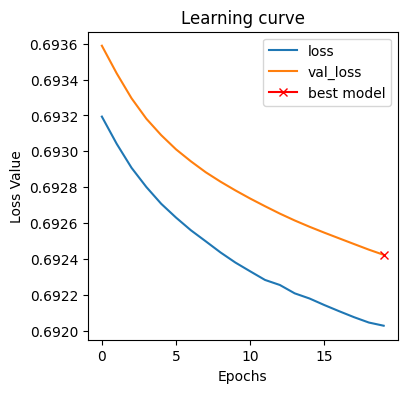

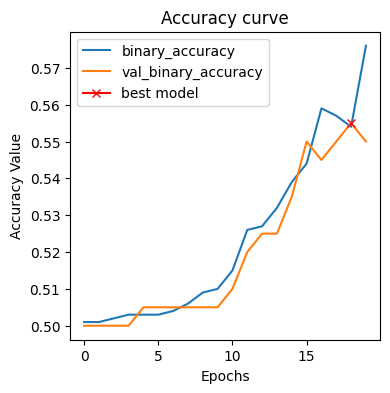

-----------------
Number of epochs: 200, learing rate: 1e-05
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                           

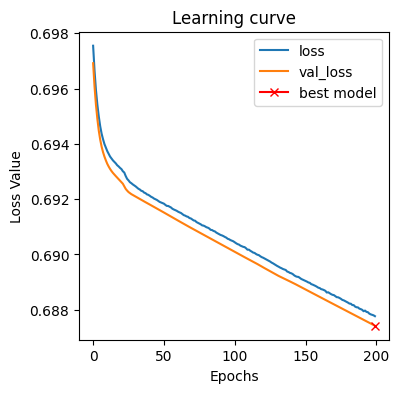

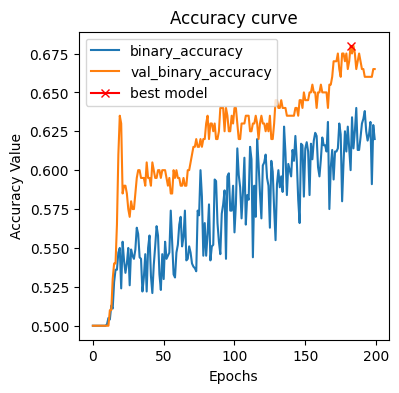

-----------------
Number of epochs: 200, learing rate: 0.0001
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 65536)             0         
                                                          

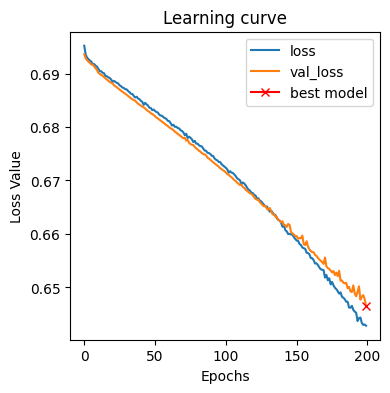

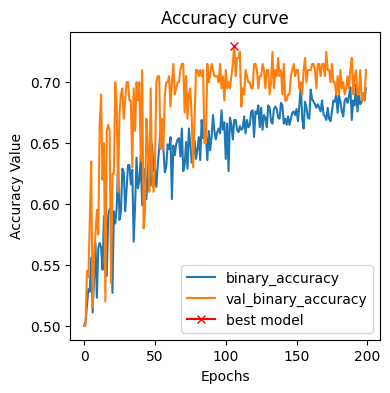

-----------------


In [3]:
from utils.Models import LeNet
from tensorflow.keras.optimizers import SGD
from utils.Plots import lossPlot, accuracyPlot

img_w, img_h = 128, 128
img_ch = 1
base = 32
batch_size = 8
parameters = [
    {
        "n_epochs": 20,
        "LR": 0.00001
    },
    {
        "n_epochs": 200,
        "LR": 0.00001
    },
    {
        "n_epochs": 200,
        "LR": 0.0001
    }
]

for i in parameters:
    
    n_epochs, LR = i.values()

    print(f"Number of epochs: {n_epochs}, learing rate: {LR}")
    model = LeNet(img_ch, img_w, img_h, base)
    model.compile(loss='BinaryCrossentropy', optimizer = SGD(learning_rate = LR), metrics=['binary_accuracy'])
    model_fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=[x_test,y_test])
    
    lossPlot(model_fit)
    accuracyPlot(model_fit)
    print("-----------------")
